In [1]:
# Import of necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import sklearn.metrics as metrics
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

nltk.download ('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#  Load and explore the data

In [2]:
# Load the CSV file(s) as reviews.
# View the DataFrame
reviews = pd.read_csv("turtle_reviews.csv")
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
#data frame data type
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [4]:
#data frame information
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Check for missing values
reviews.isna().sum().sum()

0

In [6]:
# Descriptive statistics
reviews = pd.read_csv("turtle_reviews.csv")
reviews
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


# Drop columns

In [7]:
# Drop unnecessary columns and view data frame
reviews.drop(['language','platform'],axis=1)

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


#  Rename columns

In [8]:
# Rename the column headers and view data frame 
reviews.rename (columns={'remuneration (k£)': 'rmtn', 'spending_score (1-100)': 'SS'}, inplace=True)
reviews.head()

,gender,age,rmtn,SS,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


#  Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output
reviews.to_csv ('n_reviews.csv')

In [10]:
# Import new CSV file with Pandas and View DataFrame
reviews = pd.read_csv("n_reviews.csv")
reviews

,Unnamed: 0,gender,age,rmtn,SS,loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [11]:
#print data shape
print(reviews.shape)

(2000, 12)


In [12]:
#print data frame info 
print (reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   rmtn            2000 non-null   float64
 4   SS              2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   language        2000 non-null   object 
 8   platform        2000 non-null   object 
 9   product         2000 non-null   int64  
 10  review          2000 non-null   object 
 11  summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 187.6+ KB
None


# Linear regression

###  spending vs loyalty

In [13]:
# OLS model and summary
model = sm.OLS(reviews['loyalty_points'], reviews['SS']).fit()

In [14]:
# Print OLS model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         loyalty_points   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              7156.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:56:09   Log-Likelihood:                         -16552.
No. Observations:                2000   AIC:                                  3.311e+04
Df Residuals:                    1999   BIC:                                  3.311e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

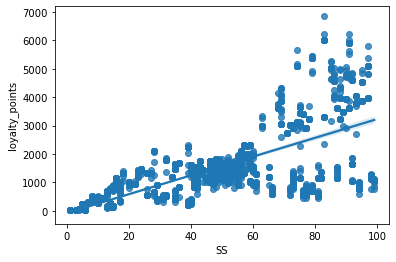

In [15]:
# Plot the graph  with a regression line
sns.regplot( x= "SS", y = "loyalty_points", data = reviews)
  
plt.show()

In [16]:
# OLS model and summary 
model = sm.OLS(reviews['rmtn'], reviews['loyalty_points']).fit()

In [17]:
# Print OLS model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   rmtn   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              6091.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:56:09   Log-Likelihood:                         -9393.6
No. Observations:                2000   AIC:                                  1.879e+04
Df Residuals:                    1999   BIC:                                  1.879e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### renumeration vs loyalty

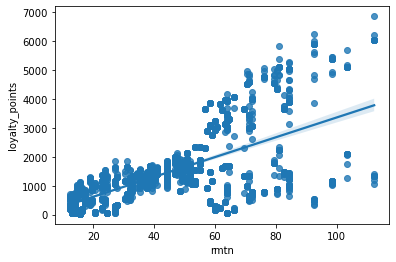

In [18]:
# Plot the graph  with a regression line
sns.regplot( x= "rmtn", y = "loyalty_points", data = reviews)
  
plt.show()

###  age vs loyalty

In [19]:
# OLS model and summary 
model = sm.OLS(reviews['age'], reviews['loyalty_points']).fit()

In [20]:
# Print OLS model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    age   R-squared (uncentered):                   0.526
Model:                            OLS   Adj. R-squared (uncentered):              0.526
Method:                 Least Squares   F-statistic:                              2217.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:56:09   Log-Likelihood:                         -9555.7
No. Observations:                2000   AIC:                                  1.911e+04
Df Residuals:                    1999   BIC:                                  1.912e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

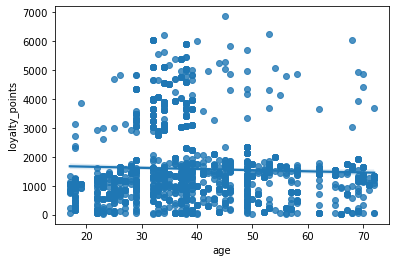

In [21]:
# Plot the graph  with a regression line
sns.regplot( x= "age", y = "loyalty_points", data = reviews)
  
plt.show()

#  Load and explore the data

In [22]:
# Import of necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [23]:
# Load the CSV file(s) as reviews.
# View the DataFrame.
reviews = pd.read_csv("n_reviews.csv")
reviews

,Unnamed: 0,gender,age,rmtn,SS,loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [24]:
# Drop unnecessary columns and view dataframe
reviews.drop(['Unnamed: 0','gender','age','loyalty_points','education','language','platform','product','review','summary'],axis=1)

,rmtn,SS
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [25]:
#drop unecessary columns
reviews.drop([])

,Unnamed: 0,gender,age,rmtn,SS,loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [26]:
#name new data frame as df2
df2 = reviews.drop(['Unnamed: 0','gender','age','loyalty_points','education','language','platform','product','review','summary'],axis=1)

In [27]:
#save as csv
reviews.to_csv ('df2.csv')

In [28]:
df2.head()

,rmtn,SS
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [29]:
#print info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rmtn    2000 non-null   float64
 1   SS      2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [30]:
## Descriptive statistics
df2.describe()

,rmtn,SS
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


# Plot

In [31]:
 #Sorting the Data frame in Ascending order
df2.sort_values(by=['rmtn','SS'])  

,rmtn,SS
0,12.30,39
200,12.30,39
400,12.30,39
600,12.30,39
800,12.30,39
...,...,...
1199,112.34,83
1399,112.34,83
1706,112.34,83
1769,112.34,83


In [32]:
# OLS model and summary
model = sm.OLS(reviews['rmtn'], reviews['SS']).fit()

In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   rmtn   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                              3557.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:56:10   Log-Likelihood:                         -9769.3
No. Observations:                2000   AIC:                                  1.954e+04
Df Residuals:                    1999   BIC:                                  1.955e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<AxesSubplot:xlabel='rmtn', ylabel='SS'>

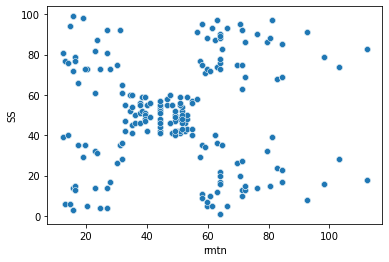

In [34]:
# Create a scatterplot with Seaborn
sns. scatterplot(x= "rmtn", y = "SS", data= reviews)

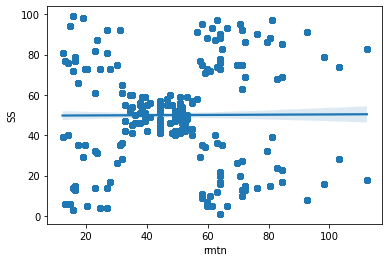

In [35]:
# Create a scatterplot with Seaborn with a trendline
sns.regplot( x= "rmtn", y = "SS", data = reviews)
  
plt.show()

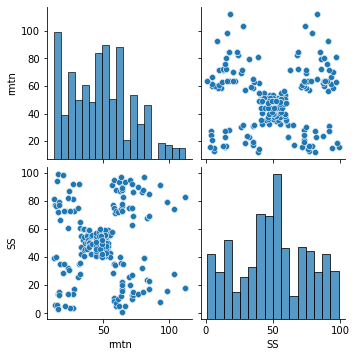

In [36]:
# Create a pairplot with Seaborn.
sns.pairplot(df2[["rmtn", "SS"]])

# Elbow Method

In [37]:
#imports
import sklearn.cluster as cluster 

In [38]:
X = reviews.iloc[:, [3,4]].values

X[:5]

array([[12.3 , 39.  ],
       [12.3 , 81.  ],
       [13.12,  6.  ],
       [13.12, 77.  ],
       [13.94, 40.  ]])

In [39]:
scores = []
k = range(1, 12)
for i in k:
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)

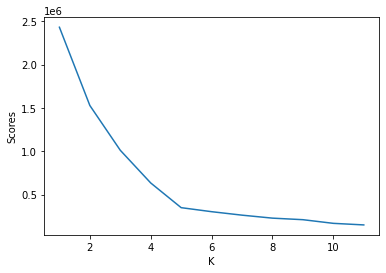

In [40]:
plt.plot(k,scores,)
plt.xlabel("K")
plt.ylabel("Scores")
plt.show()

### Evaluate k-means model at different values of k

In [41]:
kMeans= KMeans(n_clusters =5,)
result = kMeans.fit_predict(X)
result

array([3, 4, 3, ..., 2, 0, 0])

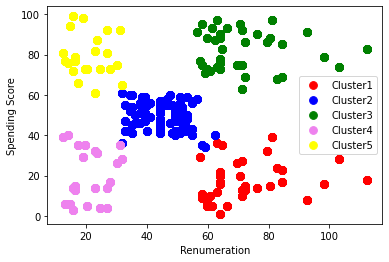

In [42]:
plt.scatter(X[result == 0, 0], X[result == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[result == 1, 0], X[result == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[result == 2, 0], X[result == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[result == 3, 0], X[result == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[result == 4, 0], X[result == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.xlabel('Renumeration')
plt.ylabel('Spending Score') 
plt.legend() 

plt.show()

plt.scatter(X[result == 1, 0], X[result == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[result == 2, 0], X[result == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[result == 3, 0], X[result == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[result == 4, 0], X[result == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.xlabel('Renumeration')
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

plt.show()

# Silhouette  Method

In [43]:
k = range(2,12)
sil_score = []
for i in k:
    labels= KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    score = metrics.silhouette_score(X,labels,metric="euclidean")
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean")))

Silhouette score for k(clusters) = 2 is 0.3203710299022974
Silhouette score for k(clusters) = 3 is 0.44629889605772355
Silhouette score for k(clusters) = 4 is 0.5121777811595611
Silhouette score for k(clusters) = 5 is 0.5834953298348279
Silhouette score for k(clusters) = 6 is 0.5618346402303038
Silhouette score for k(clusters) = 7 is 0.5411943865044133
Silhouette score for k(clusters) = 8 is 0.5228627698442685
Silhouette score for k(clusters) = 9 is 0.4669355380258951
Silhouette score for k(clusters) = 10 is 0.4688580230624676
Silhouette score for k(clusters) = 11 is 0.4646143605310606


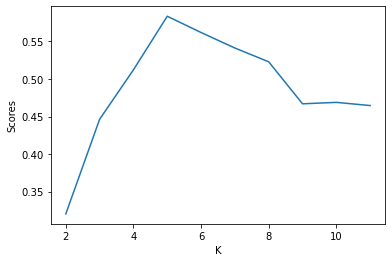

In [44]:
plt.plot(k,sil_score)
plt.xlabel("K")
plt.ylabel("Scores")
plt.show()

In [45]:
X

array([[12.3 , 39.  ],
       [12.3 , 81.  ],
       [13.12,  6.  ],
       ...,
       [92.66, 91.  ],
       [98.4 , 16.  ],
       [92.66,  8.  ]])

### Evaluate k-means model at different values of k

In [46]:
kMeans= KMeans(n_clusters =5)
result = kMeans.fit_predict(X)
result

array([1, 0, 1, ..., 2, 3, 3])

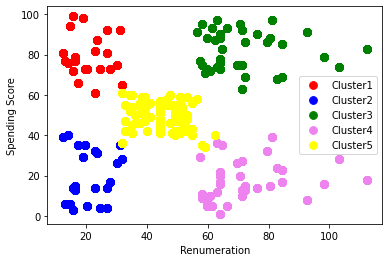

In [47]:
# Determine the number of clusters: Silhouette method
plt.scatter(X[result == 0, 0], X[result == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[result == 1, 0], X[result == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[result == 2, 0], X[result == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[result == 3, 0], X[result == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[result == 4, 0], X[result == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.xlabel('Renumeration')
plt.ylabel('Spending Score') 
plt.legend() 
#view cluster
plt.show()

In [48]:
!pip install WordCloud

In [49]:
!pip install TextBlob

# Load and explore the data

In [50]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [51]:
#read review dataframe
reviews = pd.read_csv("n_reviews.csv")
reviews

,Unnamed: 0,gender,age,rmtn,SS,loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [52]:
#drop necessary columns
df3 = reviews.drop(['Unnamed: 0','gender','age','rmtn','SS','loyalty_points','education','language','platform','product'],axis=1)

In [53]:
#print dataframe
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [54]:
#new dataframe info 
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [55]:
#Descriptive statistics
df3.describe()

,review,summary
count,2000,2000
unique,1980,1432
top,love it,Five Stars
freq,5,378


In [56]:
df3["review"].value_counts()

love it                                                                                                                                                                                                                                                                                                                                                     5
great game                                                                                                                                                                                                                                                                                                                                                  3
Love it                                                                                                                                                                                                                                                                                                     

In [57]:
#summary value counts
df3["summary"].value_counts()

Five Stars                                        378
Four Stars                                         57
Three Stars                                        14
Two Stars                                          12
Great game                                         11
                                                 ... 
Fun puzzle for children                             1
Easy to manipulate                                  1
Awesome Puzzle!                                     1
Great Beginning Jigaw Puzzle                        1
The perfect word game for mixed ages (with Mom      1
Name: summary, Length: 1432, dtype: int64

In [58]:
#check for null values
df3.isnull().sum()

review     0
summary    0
dtype: int64

# 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [59]:
# Review: Change all to lower case
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [60]:
#print dataframe
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [61]:
# summary: Change all to lower case 
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [62]:
#view data frame
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

###  Replace punctuation in each of the columns respectively (review and summary)

In [63]:
# Replace all the punctuations in review column
df3['review'] = df3['review'].str.replace('[^\w\s]','')

In [64]:
#print results
df3['review'].head

<bound method NDFrame.head of 0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game did not think i would like it when ...
1997             great game for all keeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object>

### Drop duplicates in both columns

In [65]:
# Replace all the punctuations in review column
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

In [66]:
#print results
df3['summary'].head

<bound method NDFrame.head of 0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object>

### Drop duplicates in both columns

In [67]:
#remove duplicates 
df3.drop_duplicates()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


### Tokenise and create wordclouds

In [68]:
#make a copy of the data frame
df3.copy()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [69]:
#view data frame
reviews = df3["review"]

In [70]:
# Apply tokenisation
df3['tokenizedReviews'] = df3["review"].apply(word_tokenize)
tokenizedReviews = df3['tokenizedReviews']

In [71]:
# Apply tokenisation 
df3['tokenizedSummary'] = df3["summary"].apply(word_tokenize)
tokenizedSummary = df3['tokenizedSummary']

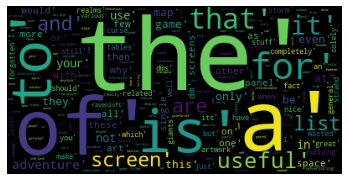

In [72]:
# Review: Create a word cloud
text = tokenizedReviews.values 


wordcloud = WordCloud().generate(str(text))


plt.imshow(wordcloud)
plt.axis("off")
plt.show()

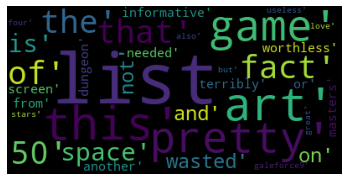

In [73]:
# Review: Create a word cloud.
text = tokenizedSummary.values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [74]:
# Define an empty list of tokens.
review_tokens = []

for i in range(df3.shape[0]):
    # Add each token to the list.
    review_tokens = review_tokens + df3['tokenizedReviews'][i]
review_tokens

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [75]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(review_tokens)

# Preview data.
fdist



FreqDist({'the': 5452, 'and': 3234, 'to': 3164, 'a': 3161, 'of': 2488, 'i': 2091, 'it': 2090, 'is': 1782, 'this': 1776, 'game': 1685, ...})

In [76]:
# Define an empty list of tokens.
summary_tokens = []

for i in range(df3.shape[0]):
    # Add each token to the list.
    summary_tokens = summary_tokens + df3['tokenizedSummary'][i]
summary_tokens

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

### Create frequency distribution

In [77]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(summary_tokens)

# Preview data.
fdist


FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### Create wordcloud without stopwords

In [78]:
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
review_tokens = [x for x in review_tokens if x.lower() not in english_stopwords]
review_tokens = [word for word in review_tokens if word.isalnum()]


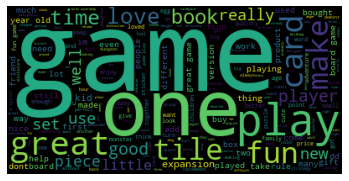

In [79]:
#print wordcloud
text = review_tokens

wordCloud_tokens=(" ").join(text)
wordcloud = WordCloud().generate(wordCloud_tokens)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [80]:

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
summary_tokens = [x for x in summary_tokens if x.lower() not in english_stopwords]
summary_tokens = [word for word in summary_tokens if word.isalnum()]



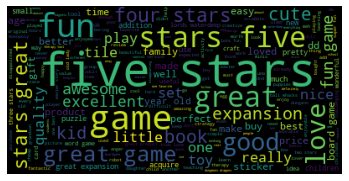

In [81]:
#print wordcloud
wordCloud_tokens=(" ").join(summary_tokens)
wordcloud = WordCloud().generate(wordCloud_tokens)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Identify 15 most common words and polarity

In [82]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(review_tokens).most_common(15),
                      columns=['Word', 'Frequency'])

# Preview data.
counts_review

,Word,Frequency
0,game,1685
1,great,596
2,fun,553
3,one,530
4,play,502
5,like,414
6,love,331
7,really,319
8,get,319
9,cards,301


In [83]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(summary_tokens).most_common(15),
                      columns=['Word', 'Frequency'])

# Preview data.
counts_summary

,Word,Frequency
0,stars,466
1,five,381
2,game,319
3,great,295
4,fun,218
5,love,93
6,good,92
7,four,58
8,like,54
9,expansion,52


In [84]:
#count of words
counts_review

,Word,Frequency
0,game,1685
1,great,596
2,fun,553
3,one,530
4,play,502
5,like,414
6,love,331
7,really,319
8,get,319
9,cards,301


### Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns

In [85]:
words = []
polarities = []
for word in counts_review['Word'].values.tolist():
    words.append(word)
    polarities.append(TextBlob(word).polarity)
    
most_common_review_polarity = pd.DataFrame({'word': words, 'polarity': polarities})
most_common_review_polarity.head()


,word,polarity
0,game,-0.4
1,great,0.8
2,fun,0.3
3,one,0.0
4,play,0.0


In [86]:
words = []
polarities = []
for word in counts_summary['Word'].values.tolist():
    words.append(word)
    polarities.append(TextBlob(word).polarity)
    
most_common_summary_polarity = pd.DataFrame({'word': words, 'polarity': polarities})
most_common_summary_polarity.head(15)


,word,polarity
0,stars,0.0
1,five,0.0
2,game,-0.4
3,great,0.8
4,fun,0.3
5,love,0.5
6,good,0.7
7,four,0.0
8,like,0.0
9,expansion,0.0


array([[<AxesSubplot:title={'center':'polarity'}>]], dtype=object)

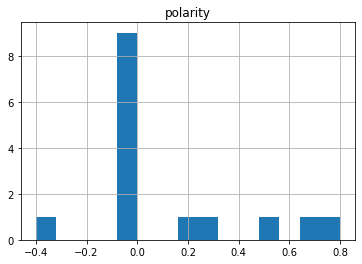

In [87]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
most_common_review_polarity.hist(column= "polarity", bins = 15)

array([[<AxesSubplot:title={'center':'polarity'}>]], dtype=object)

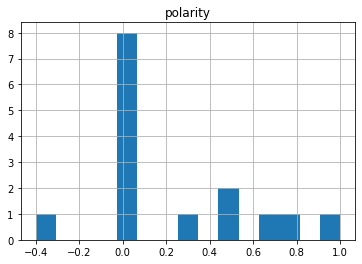

In [88]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
most_common_summary_polarity.hist(column= "polarity", bins = 15)

### Identify top 20 positive and negative reviews and summaries respectively

In [89]:
# Provided function
def getpolarity(text):
    return TextBlob(text).polarity

In [90]:
df3['reviews_polarity'] = df3['review'].apply(getpolarity)
df3['summary_polarity'] = df3['summary'].apply(getpolarity)

In [91]:
# Top 20 negative reviews.


# View output.
df3.sort_values(by = "reviews_polarity", ascending = True)[["review","reviews_polarity"]].head(20)


,review,reviews_polarity
208,booo unles you are patient know how to measure...,-1.000000
182,incomplete kit very disappointing,-0.780000
1804,im sorry i just find this product to be boring...,-0.583333
364,one of my staff will be using this game soon s...,-0.550000
230,i found the directions difficult,-0.500000
117,i bought this as a christmas gift for my grand...,-0.500000
301,difficult,-0.500000
1524,expensive for what you get,-0.500000
227,this was a gift for my daughter i found it dif...,-0.500000
290,instructions are complicated to follow,-0.500000


In [92]:
# Top 20 positive reviews.


# View output.
df3.sort_values(by = "reviews_polarity", ascending = False)[["review","reviews_polarity"]].head(20)


,review,reviews_polarity
1168,best set buy 2 if you have the means,1.0
1401,one of the best board games i played in along ...,1.0
1967,perfect for tutoring my grandson in spelling,1.0
621,wonderful for my grandson to learn the resurre...,1.0
1720,it is the best thing to play with and also min...,1.0
609,delightful product,1.0
591,wonderful product,1.0
496,excellent activity for teaching selfmanagement...,1.0
194,awesome gift,1.0
1301,its awesome,1.0


In [93]:
# Top 20 negative summary.


# View output.
df3.sort_values(by = "summary_polarity", ascending = True)[["summary","summary_polarity"]].head(20)

,summary,summary_polarity
21,the worst value ive ever seen,-1.000000
208,boring unless you are a craft person which i am,-1.000000
829,boring,-1.000000
1166,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
1620,disappointed,-0.750000
144,disappointed,-0.750000
793,disappointed,-0.750000
631,disappointed,-0.750000
363,promotes anger instead of teaching calming met...,-0.700000


In [94]:
# Top 20 positive reviews.


# View output.
df3.sort_values(by = "summary_polarity", ascending = False)[["summary","summary_polarity"]].head(20)

,summary,summary_polarity
1417,wonderful and,1.0
1427,excellent expansion,1.0
580,the pigeon is the perfect addition to a school...,1.0
815,one of the best games ever,1.0
1656,a wonderful reading resource,1.0
475,excellent,1.0
1094,excellent product and everything i wanted it t...,1.0
1649,wonderful telling of a heart wrenching tale,1.0
1093,awesome,1.0
418,perfect,1.0
